# 1. Rock Scissor Paper Classification

## 1) Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os 
from PIL import Image
import glob
from sklearn.model_selection import train_test_split

print(tf.__version__)

2022-01-21 01:09:48.770908: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1


In [2]:
file_list = ['rock', 'scissor', 'paper']

## 2) Preprocess

In [3]:

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    #resize to 28 x 28
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

In [4]:

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

for i in file_list:
    image_dir_path = os.getenv('HOME')+'/DL/aiffel/Exp/ex01/rock_scissor_paper_dataset/'+ i
    resize_images(image_dir_path)

    print("resize 완료!")

500  images to be resized.
500  images resized.
resize 완료!
500  images to be resized.
500  images resized.
resize 완료!
500  images to be resized.
500  images resized.
resize 완료!


## 3) Load Dataset

In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # number_of_data is sum of all number of images
    # scissor : 0, rock : 1, paper : 2
    img_size=28
    color=3
    # create img and label matrixes 
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0  
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    print("number of train data(x_train) is ", idx)
    return imgs, labels

image_dir_path = os.getenv("HOME") + '/DL/aiffel/Exp/ex01/rock_scissor_paper_dataset/'
(x_train, y_train)=load_data(image_dir_path,number_of_data=1500)
x_train_norm = x_train/255.0   # Nomalization

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

number of train data(x_train) is  1500
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


라벨:  0


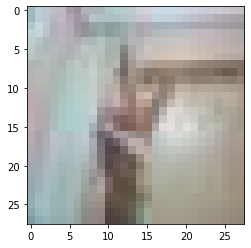

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

In [8]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


1050
450
1050
450


## 4) Build Model 

In [26]:


n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [27]:

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Epoch 1/20
33/33 [==============================] - 0s 2ms/step - loss: 9.8466 - accuracy: 0.3717
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.8905 - accuracy: 0.5762
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.7779
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8040
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8503
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8790
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9263
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9644
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9622
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9738
Epoch 11/20
33/33 [